In [5]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%pdb off

from pyCascade import probePost, physics, utils
from pyCascade.probeReadWrite import read_probes_file_switch
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import numpy as np
import scipy as sp
import os
from IPython.core.debugger import set_trace
import pandas as pd
import seaborn as sns
from fnmatch import fnmatch
from cycler import cycler
import plotly.express as px
import plotly

plt.rcParams['figure.dpi'] = 140
im_scaling = .75
plt.rcParams['figure.figsize'] = [6.4 * im_scaling, 4.8 * im_scaling]

category =  "config3"

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned OFF


'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

In [6]:
hm = 6
window_dim = hm/2/4
velTenMeters = 4

velocity_scaling = 1/velTenMeters
ventilation_scaling = velocity_scaling/(window_dim**2)

@utils.no_kwargs
@utils.dict_apply
def norm_vel(df):
    return df * velocity_scaling

@utils.no_kwargs
@utils.dict_apply
def norm_vent(df):
    return df * ventilation_scaling

@utils.no_kwargs
@utils.dict_apply
def abs_values(df):
    return df.abs()

@utils.no_kwargs
@utils.dict_apply
def flip_data(df):
    return -df


In [7]:
run = 1
probes_dir = f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut'
oak_probes_dir =  f'{home_dir}/CHARLES/{category}/R{run}/probes/probesOut_parquet/'

In [8]:
# probes = probePost.Probes(probes_dir, directory_parquet=oak_probes_dir, file_type = "csv")
# probes.to_parquet(overwrite=True)

probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, file_type = "parquet")

nameKey = read_probes_file_switch(f"{probes_dir}/../locations/nameKey_extraProbe.txt")
nameKey = nameKey.compute()

extraProbe = nameKey.copy()
extraProbe = pd.concat([extraProbe, probes.locations["extraProbe"]], axis = "columns")
for qoi in ["comp(u_avg,0)", "comp(u_avg,1)", "comp(u_avg,2)"]:
    df = probePost.ddf_to_pdf(probes.data[("extraProbe", qoi)]).iloc[-1]
    df.name = qoi
    extraProbe = pd.concat([extraProbe, df], axis = "columns")
extraProbe.set_index(0, inplace=True)
extraProbe = extraProbe.rename(columns=lambda x: f"EP_{x}")
extraProbe = extraProbe.rename(index=lambda x: x.replace("extraProbe_", ''))
display(extraProbe)

del probes

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bx.README.parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bz.comp(u,2).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bx.comp(u,1).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bz.comp(u,2).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bx.p.parquet took 2 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1.README.parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bz.comp(u,0).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bz.p.parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bx.comp(u,0).parquet took 3 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0.comp(u,2).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bx.comp(u,2).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bx.comp(u,0).parquet took 2 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2.README.parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0.comp(u,0).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2.comp(u,0).parquet took 2 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//extraProbe.comp(u_avg,1).parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bz.comp(u,2).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bx.comp(u,2).parquet took 3 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bxz.comp(u,0).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bx.comp(u,0).parquet took 3 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bz.README.parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bxz.comp(u,2).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bxz.comp(u,1).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1.comp(u,2).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bz.comp(u,1).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//extraProbe.comp(u_avg,0).parquet took 0 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bxz.README.parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bx.comp(u,1).parquet took 2 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bxz.README.parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bx.p.parquet took 3 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//extraProbe.README.parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1.comp(u,1).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bz.p.parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bxz.p.parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1.comp(u,0).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0.p.parquet took 3 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bxz.p.parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bz.comp(u,0).parquet took 2 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0.README.parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bxz.p.parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bxz.comp(u,0).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bxz.comp(u,1).parquet took 2 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//extraProbe.comp(u_avg,2).parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bx.comp(u,1).parquet took 3 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1.p.parquet took 3 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2.comp(u,1).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bz.comp(u,1).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bx.comp(u,2).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bxz.comp(u,2).parquet took 3 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bz.comp(u,1).parquet took 2 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bxz.README.parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2.comp(u,2).parquet took 3 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bx.p.parquet took 3 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bxz.comp(u,0).parquet took 3 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bz.comp(u,0).parquet took 2 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bz.README.parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0.comp(u,1).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bxz.comp(u,2).parquet took 3 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bz.p.parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2_Bxz.comp(u,1).parquet took 2 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n2.p.parquet took 2 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bx.README.parquet took 0 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-n1_Bz.README.parquet took 0 seconds
writing /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R1/probes/probesOut_parquet//col_0-0_Bx.README.parquet took 0 seconds


/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/pyarrow/pandas_compat.py:456: FutureWarning: is_sparse is deprecated and will be removed in a futu

EP_x  EP_y    EP_z  EP_comp(u_avg,0)  \
0                                                              
roof_sl                66.00  12.0   90.00          3.323475   
xwindow_0-0_sl         61.55   1.5   88.00          0.437873   
zwindow_0-0_sl         62.00   1.5   87.55          0.519582   
xwindow_0-1_sl         61.55   1.5   92.00          0.414640   
zwindow_0-1_sl         62.00   1.5   95.45          1.856570   
...                      ...   ...     ...               ...   
zwindow_0-1_h_0-2_Bxz -86.00   1.5 -167.45          2.242977   
zwindow_1-0_h_0-2_Bxz -90.00   1.5 -159.55          0.062184   
zwindow_1-1_h_0-2_Bxz -90.00   1.5 -167.45          2.099206   
zwindow_2-0_h_0-2_Bxz -94.00   1.5 -159.55         -0.289358   
zwindow_2-1_h_0-2_Bxz -94.00   1.5 -167.45          2.281597   

                       EP_comp(u_avg,1)  EP_comp(u_avg,2)  
0                                                          
roof_sl                       -0.067263          0.010787  
xwindow_0-0_sl                -0.320721         -0.265007  
zwindow_0-0_sl                -0.138088          0.256474  
xwindow_0-1_sl                -0.351426          0.215957  
zwindow_0-1_sl                -0.007474         -0.010977  
...                                 ...               ...  
zwindow_0-1_h_0-2_Bxz         -0.170464          0.132401  
zwindow_1-0_h_0-2_Bxz          0.004741          0.120173  
zwindow_1-1_h_0-2_Bxz          0.040017          0.080988  
zwindow_2-0_h_0-2_Bxz          0.074215         -0.173784  
zwindow_2-1_h_0-2_Bxz          0.011523         -0.021345  

[240 rows x 6 columns]

In [9]:
qoisOutputed = ["mass_flux", "comp(u,0)"]
qois= ["mass_flux"]

# probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, probe_type = "FLUX_PROBES", flux_quants = qoisOutputed)
# probes.to_parquet(overwrite = True)

probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, probe_type = "FLUX_PROBES", flux_quants = qoisOutputed, file_type = "parquet")



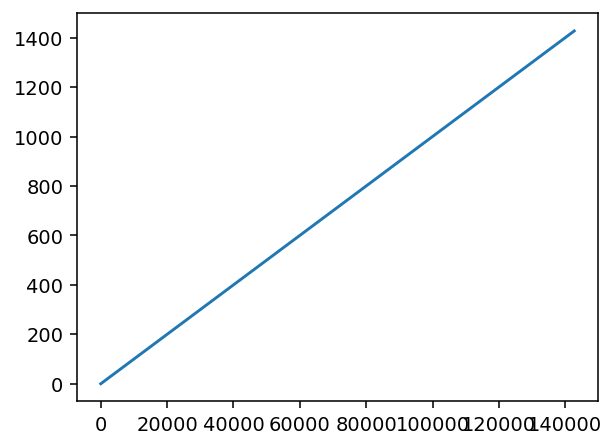

In [10]:
plt.figure()
plt.plot(probes.probe_steps, probes.probe_times)
plt.show()

In [11]:
start = 30000
stop = -1
by = 1

In [12]:
# plt.figure()
# foo_mass = probes.data[("xwindow_0-0_h_3-0_Bx", qoisOutputed[0])].compute()
# foo_u = probes.data[("xwindow_0-0_h_3-0_Bx", qoisOutputed[1])].compute()
# foo_area = probes.areas["xwindow_0-0_h_3-0_Bx"]
# plt.plot(foo_mass.values/foo_u.values)
# plt.ylim(0,1.225*2)


In [13]:
# plt.figure()
# N = len(foo_mass)
# f, E = sp.signal.welch(foo_mass.values, fs = probes.dt, axis = 0, nperseg = N//4, scaling = 'density', detrend = 'constant') 
# plt.loglog(f, E)

## X Flow


In [14]:
@utils.no_kwargs
def norm_norm_blocks(data_dict):
    if category == "config2":
        return probePost.mul_names(data_dict, [name for name in probes.probe_names if "Bxz" in name or "Bz" in name], -1)
    return data_dict

# (fig, ax) = probes.time_plots(
#     names = [name for name in  probes.probe_names if "xwindow_" in name], 
#     steps = probes.probe_steps[start:stop:by],
#     quants = qois,
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     processing = [norm_vent, norm_norm_blocks],
#     parrallel=True
#     )

## mean statistics
x_mean = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, probePost.time_average, norm_norm_blocks],
    parrallel=False
    )

## rms statistics
x_rms = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, probePost.time_rms],
    parrallel=False
    )

## Net flow
x_net = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, abs_values, probePost.time_average],
    parrallel=False
    )

x_flowStats = pd.concat([x_mean, x_rms, x_net], axis = "index").T
x_flowStats.columns = ["mean", "rms", "net"]

processing data took 6 seconds
processing data took 2 seconds
processing data took 2 seconds


In [15]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows', bbox = "tight")

# x_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xmean.csv')
# x_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xrms.csv')
# x_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xnet.csv')

## Z Flow


In [16]:
@utils.no_kwargs
def norm_norm_windows(data_dict):
    return probePost.mul_names(data_dict, [name for name in probes.probe_names if fnmatch(name, "*window_?-1*")], -1)

@utils.no_kwargs
def norm_norm_blocks(data_dict):
    if category == "config2":
        return probePost.mul_names(data_dict, [name for name in probes.probe_names if "Bxz" in name or "Bx" in name], -1)
    return data_dict

# (fig, ax) = probes.time_plots(
#     names = [name for name in  probes.probe_names if "zwindow" in name], 
#     steps = probes.probe_steps[start:stop:by],
#     quants = qois,
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     processing = [norm_vent, norm_norm_windows, norm_norm_blocks],
#     parrallel=True
#     )

## mean statistics
z_mean = probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, probePost.time_average, norm_norm_windows, norm_norm_blocks],
    parrallel=False
    )

## rms statistics
z_rms = probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, probePost.time_rms],
    parrallel=False
    )

## Net flow
z_net = probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, abs_values, probePost.time_average],
    parrallel=False
    )

z_flowStats = pd.concat([z_mean, z_rms, z_net], axis = "index").T
z_flowStats.columns = ["mean", "rms", "net"]

processing data took 18 seconds
processing data took 7 seconds
processing data took 7 seconds


In [17]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows', bbox_inches = "tight")

# z_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zmean.csv')
# z_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zrms.csv')
# z_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/znet.csv')

## Y Flow


In [18]:
# (fig, ax) = probes.time_plots(
#     names = [name for name in  probes.probe_names if "skylight" in name], 
#     steps = probes.probe_steps[start:stop:by],
#     quants = qois,
#     plot_params = {
#         'stack span' : 'y',
#         'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
#         'xlabel' : 'time $[s]$',
#         'horizontal spacing' : probes.probe_times,
#         },
#     processing = [norm_vent, norm_norm_skylights],
#     parrallel=True
#     )

## mean statistics
y_mean = probes.statistics(
    names = [name for name in  probes.probe_names if "skylight" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, probePost.time_average, flip_data],
    parrallel=False
    )

## rms statistics
y_rms = probes.statistics(
    names = [name for name in  probes.probe_names if "skylight" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, probePost.time_rms],
    parrallel=False
    )

## Net flow
y_net = probes.statistics(
    names = [name for name in  probes.probe_names if "skylight" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [norm_vent, abs_values, probePost.time_average],
    parrallel=False
    )

y_flowStats = pd.concat([y_mean, y_rms, y_net], axis = "index").T
y_flowStats.columns = ["mean", "rms", "net"]

processing data took 3 seconds
processing data took 1 seconds
processing data took 1 seconds


In [19]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/ywindows')

# y_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ymean.csv')
# y_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/yrms.csv')
# y_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/ynet.csv')

## All Flow

In [20]:
def matchNewNamingConvention(input_str):
    # Find the position of the '-' in the string
    split_index = input_str.find('_h_')

    if split_index == -1:
        return input_str #return original if no house number
    
    n1 = int(input_str[split_index+3])
    n2 = int(input_str[split_index+5])
    
    # Modify the numbers
    new_n1 = n1 - 3
    new_n2 = n2 - 2
    
    # Format the output string with the modified numbers
    output_str = f"{new_n1}-{new_n2}"
    
    return f"{input_str[:split_index+3]}{output_str}{input_str[split_index+6:]}"



In [23]:
flowStats = pd.concat([x_flowStats, y_flowStats, z_flowStats], axis = "index")
locations = probes.get_avg_locations()
areas = probes.areas
if category == "config2":
    flowStats = flowStats.rename(index=lambda x: matchNewNamingConvention(x))
    locations = locations.rename(index=lambda x: matchNewNamingConvention(x))
    areas = pd.Series(areas).rename(index=lambda x: matchNewNamingConvention(x))
flowStats = probePost.addWindowDetails(flowStats, locations, areas, extraProbe)



In [24]:

roomQois = ["mean", "net"]

connectedWindows = {
    "corner": [
        "xwindow_0-0",
        "zwindow_0-0",
        "skylight_0-0"
    ],
    "single": [
        "zwindow_1-0",
        "skylight_1-0"
    ],
    "dual": [
        "xwindow_0-1",
        "zwindow_0-1",
        "zwindow_1-1",
        "skylight_0-1",
        "skylight_1-1"
       ],
    "cross": [
        "zwindow_2-0",
        "zwindow_2-1",
        "skylight_2-0",
        "skylight_2-1"
    ]
}
sort_order = ["blockType", "houseType", "roomType"]
roomVentilation = probePost.roomStatistics(flowStats, connectedWindows, roomQois)
roomVentilation = roomVentilation.sort_values(by = sort_order)
sort_order.append("windowType")
flowStats = flowStats.sort_values(by = sort_order)
display(roomVentilation)
flowStats

mean       net contResid houseType blockType roomType  \
corner_h_0--1_B  0.220916  0.221816 -0.003235      0--1         B   corner   
cross_h_0--1_B   0.006055   0.04435 -0.001248      0--1         B    cross   
dual_h_0--1_B    0.268881  0.277566 -0.006968      0--1         B     dual   
single_h_0--1_B  0.000203  0.000281 -0.000405      0--1         B   single   
corner_h_0--2_B  0.220116  0.221528  0.002686      0--2         B   corner   
...                   ...       ...       ...       ...       ...      ...   
single_h_0-2_Bz  0.000268  0.000355  0.000536       0-2        Bz   single   
corner_sl_Bz     0.417698  0.428722  0.013638        sl        Bz   corner   
cross_sl_Bz       0.62504   0.62543 -0.001981        sl        Bz    cross   
dual_sl_Bz       0.201086  0.308861 -0.000595        sl        Bz     dual   
single_sl_Bz     0.135552   0.15819 -0.001124        sl        Bz   single   

                          x         y          z  
corner_h_0--1_B   73.037757  1.498001  51.016070  
cross_h_0--1_B    81.998327  1.497996  54.019551  
dual_h_0--1_B     74.689399  1.497998  57.336829  
single_h_0--1_B   77.999008  1.498000  50.033324  
corner_h_0--2_B   85.030664  1.497998  15.033074  
...                     ...       ...        ...  
single_h_0-2_Bz  158.027310  1.498000 -89.999996  
corner_sl_Bz      87.348088  1.997507 -61.366875  
cross_sl_Bz       90.006064  2.249397 -70.002921  
dual_sl_Bz        92.788748  2.098468 -63.219839  
single_sl_Bz      87.024574  2.249533 -66.000996  

[96 rows x 9 columns]

mean       rms       net    windowType openingType  \
xwindow_0-0_h_0--1  0.219299  0.086791  0.220204   xwindow_0-0     xwindow   
zwindow_0-0_h_0--1 -0.222533  0.087704  0.223428   zwindow_0-0     zwindow   
zwindow_2-0_h_0--1  0.005431  0.054827  0.044040   zwindow_2-0     zwindow   
zwindow_2-1_h_0--1 -0.006679  0.055434  0.044660   zwindow_2-1     zwindow   
xwindow_0-1_h_0--1  0.265397  0.100768  0.266399   xwindow_0-1     xwindow   
...                      ...       ...       ...           ...         ...   
xwindow_0-1_sl_Bz   0.119028  0.099547  0.134708   xwindow_0-1     xwindow   
zwindow_0-1_sl_Bz  -0.030105  0.164167  0.139647   zwindow_0-1     zwindow   
zwindow_1-1_sl_Bz   0.081761  0.127634  0.124475   zwindow_1-1     zwindow   
skylight_1-0_sl_Bz -0.136114  0.127276  0.158778  skylight_1-0    skylight   
zwindow_1-0_sl_Bz   0.134990  0.125812  0.157602   zwindow_1-0     zwindow   

                   windowNumber houseType blockType      area          x  ...  \
xwindow_0-0_h_0--1          0-0      0--1         B  0.568967  72.076505  ...   
zwindow_0-0_h_0--1          0-0      0--1         B  0.567006  73.999008  ...   
zwindow_2-0_h_0--1          2-0      0--1         B  0.562508  82.000015  ...   
zwindow_2-1_h_0--1          2-1      0--1         B  0.567677  81.996638  ...   
xwindow_0-1_h_0--1          0-1      0--1         B  0.569046  72.075934  ...   
...                         ...       ...       ...       ...        ...  ...   
xwindow_0-1_sl_Bz           0-1        sl        Bz  0.567907  91.999612  ...   
zwindow_0-1_sl_Bz           0-1        sl        Bz  0.567012  93.971933  ...   
zwindow_1-1_sl_Bz           1-1        sl        Bz  0.570278  93.976022  ...   
skylight_1-0_sl_Bz          1-0        sl        Bz  0.563985  87.998016  ...   
zwindow_1-0_sl_Bz           1-0        sl        Bz  0.567197  86.051132  ...   

                    EP_y   EP_z  EP_comp(u_avg,0)  EP_comp(u_avg,1)  \
xwindow_0-0_h_0--1  1.50  52.00          0.129209         -0.134626   
zwindow_0-0_h_0--1  1.50  51.55         -0.380593          0.274401   
zwindow_2-0_h_0--1  1.50  51.55          0.188477         -0.011882   
zwindow_2-1_h_0--1  1.50  59.45          1.401321         -0.013193   
xwindow_0-1_h_0--1  1.50  56.00          0.345265         -0.067074   
...                  ...    ...               ...               ...   
xwindow_0-1_sl_Bz   1.50 -61.55         -0.290399         -0.023704   
zwindow_0-1_sl_Bz   1.50 -62.00          0.254113          0.187878   
zwindow_1-1_sl_Bz   1.50 -66.00         -0.620042          0.149270   
skylight_1-0_sl_Bz  7.45 -66.00          2.585090          0.524749   
zwindow_1-0_sl_Bz   1.50 -66.00          0.634061         -0.042571   

                    EP_comp(u_avg,2)    EP_mag  EP_vel_orientation   EPR_mag  \
xwindow_0-0_h_0--1         -0.570552  0.600290          102.329833  3.507876   
zwindow_0-0_h_0--1         -0.088796  0.477527           79.297265  3.507876   
zwindow_2-0_h_0--1         -0.096134  0.211912           63.016493  3.507876   
zwindow_2-1_h_0--1          0.076784  1.403485           93.268777  3.507876   
xwindow_0-1_h_0--1         -0.215650  0.412567          146.801834  3.507876   
...                              ...       ...                 ...       ...   
xwindow_0-1_sl_Bz          -0.010100  0.291540           91.963740  3.795456   
zwindow_0-1_sl_Bz           0.533126  0.619754          114.268421  3.795456   
zwindow_1-1_sl_Bz          -0.083618  0.643215           15.517009  3.795456   
skylight_1-0_sl_Bz         -0.082278  2.639095          101.494064  3.795456   
zwindow_1-0_sl_Bz           0.019648  0.635792          175.716310  3.795456   

                    EPR_vel_orientation  roomType  
xwindow_0-0_h_0--1             0.846491    corner  
zwindow_0-0_h_0--1             0.846491    corner  
zwindow_2-0_h_0--1             0.846491     cross  
zwindow_2-1_h_0--1             0.846491     cross  
xwindow_0-1_h_0--1             0.846491 

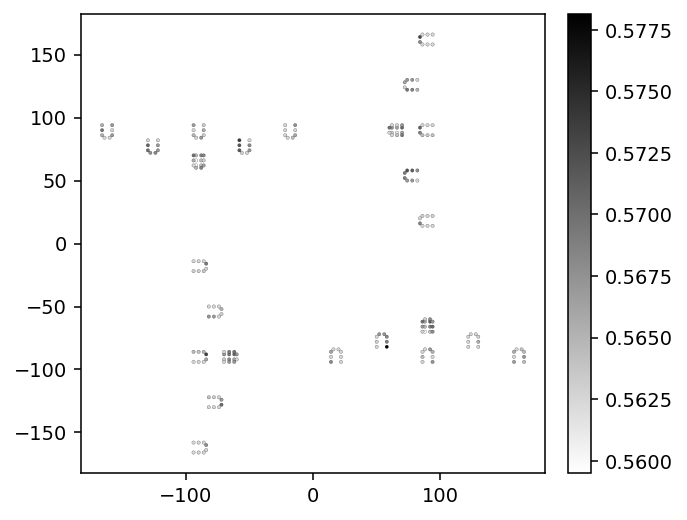

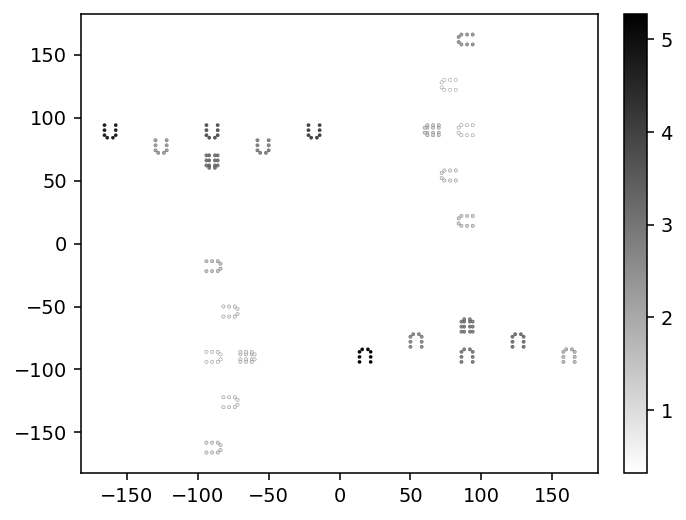

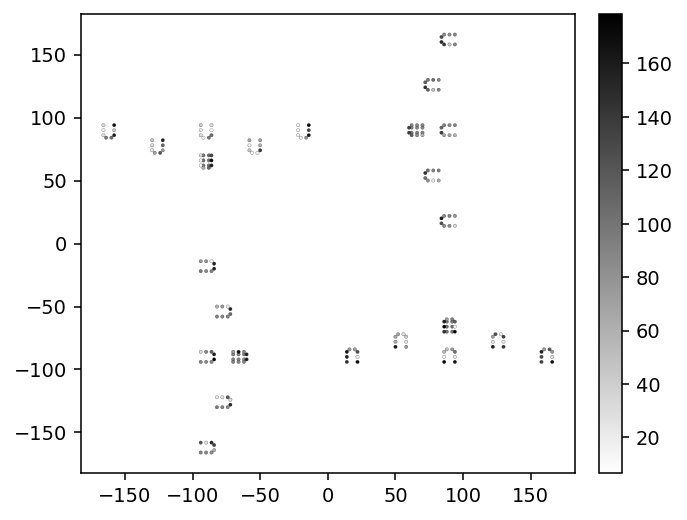

In [25]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["area"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["EPR_vel_orientation"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["EP_vel_orientation"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

In [26]:
# fig = sns.scatterplot(x = 4*np.ones_like(flowStats["mean"]), y = flowStats["mean"])
# sns.scatterplot(x = flowStats["EPR_mag"], y = flowStats["mean"])
# sns.scatterplot(x = flowStats["EP_mag"], y = flowStats["mean"])

fig = px.scatter(x = flowStats["EP_vel_orientation"], y = flowStats["mean"], color = flowStats["EP_mag"])
fig.update_xaxes(title_text='Local Wind Angle with Window Normal')
fig.update_yaxes(title_text='Normalized Ventilation Rate')
# fig.update_coloraxes(title_text='Local Wind Magnitude')
fig.show()
 

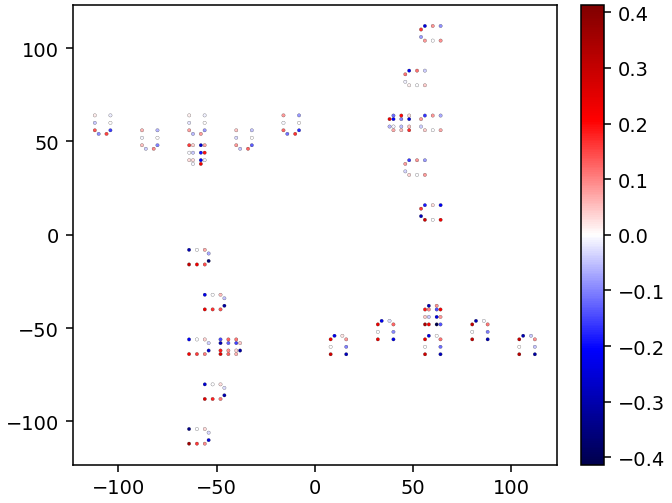

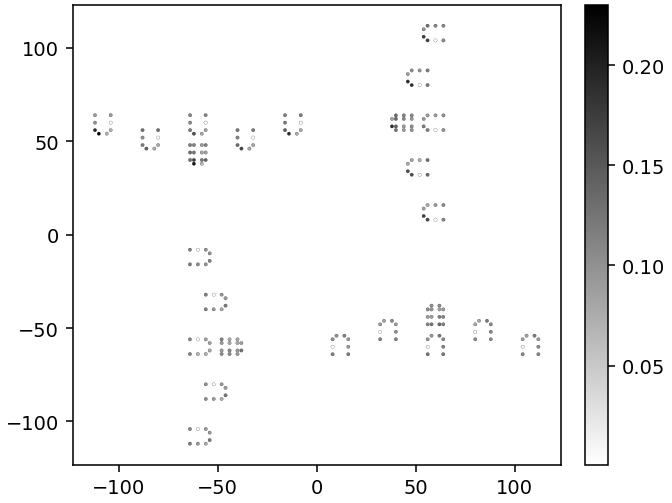

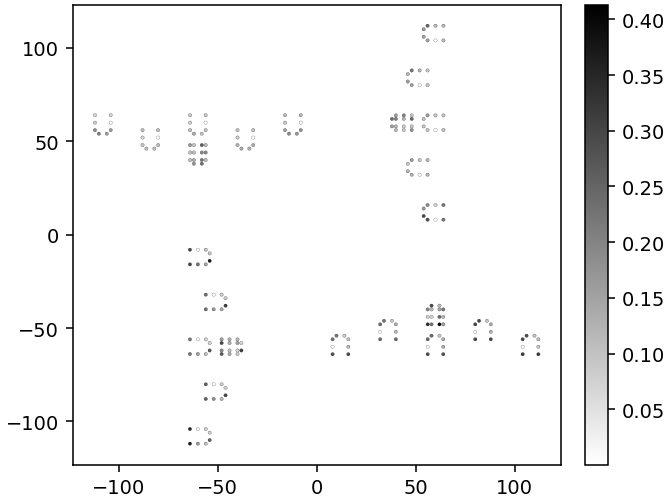

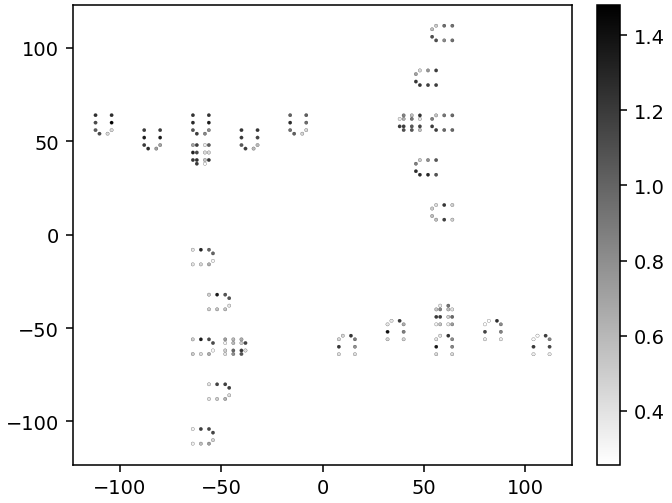

In [72]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["mean"], cmap='seismic', edgecolors="black", linewidths=.1, norm=colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["rms"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["net"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netInterior', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["rms"]/flowStats["net"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/rmsOnetInterior', bbox_inches="tight")

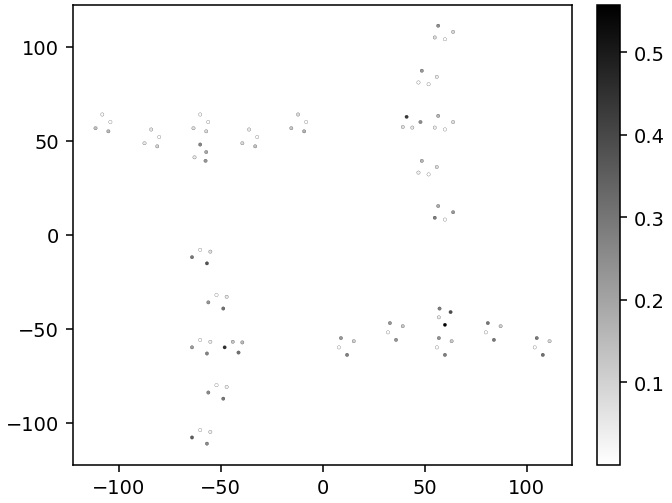

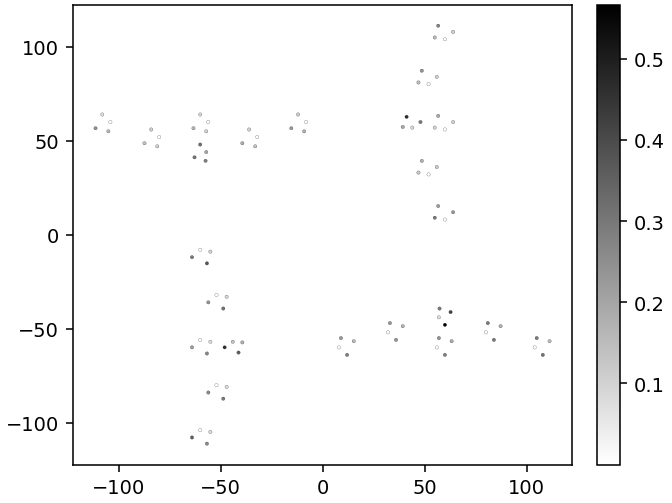

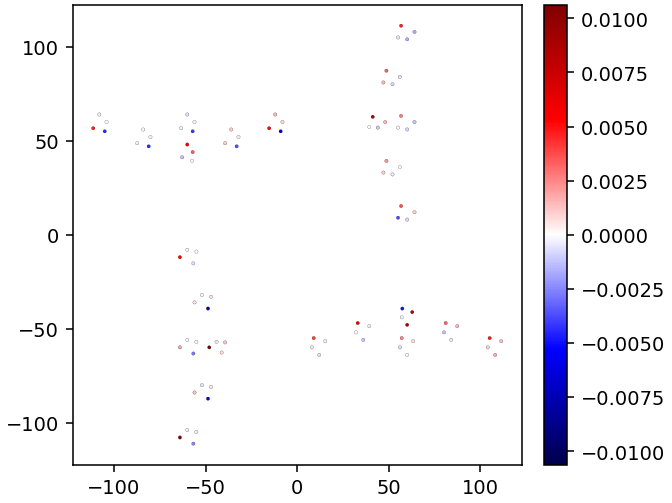

In [19]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["mean"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["net"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["contResid"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/residRooms', bbox_inches="tight")

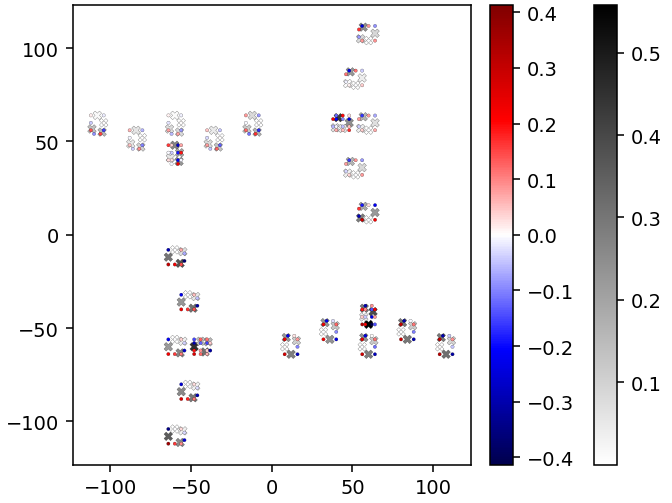

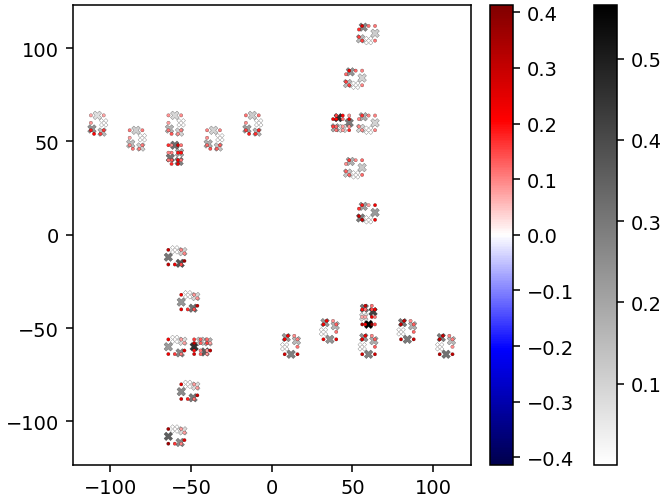

In [20]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im1=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=20, c=roomVentilation["mean"], cmap='binary', edgecolors="black", linewidths=.1, marker = 'X')
im2=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["mean"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im1)
fig.colorbar(im2)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanWindowsRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im1=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=20, c=roomVentilation["net"], cmap='binary', edgecolors="black", linewidths=.1, marker = 'X')
im2=ax.scatter(flowStats['x'], flowStats['z'], s=4*im_scaling, c=flowStats["net"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im1)
fig.colorbar(im2)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netWindowsRooms', bbox_inches="tight")

In [ ]:
fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["mean"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["net"], cmap='binary', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRooms', bbox_inches="tight")

fig, ax=plt.subplots(1, 1, constrained_layout =True)
im=ax.scatter(roomVentilation['x'], roomVentilation['z'], s=4*im_scaling, c=roomVentilation["contResid"], cmap='seismic', edgecolors="black", linewidths=.1, norm = colors.CenteredNorm())
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/residRooms', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/groups/gorle/codes/miniconda

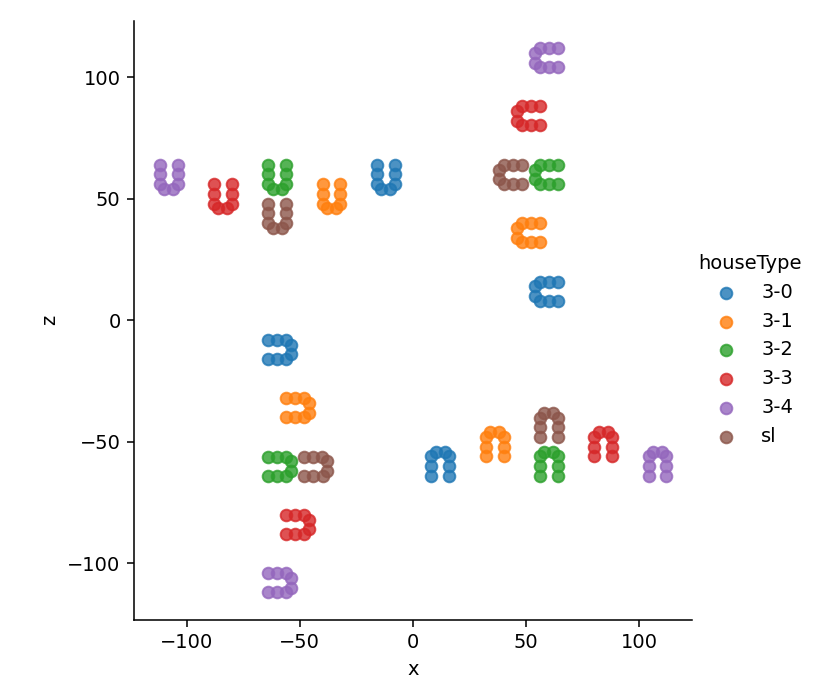

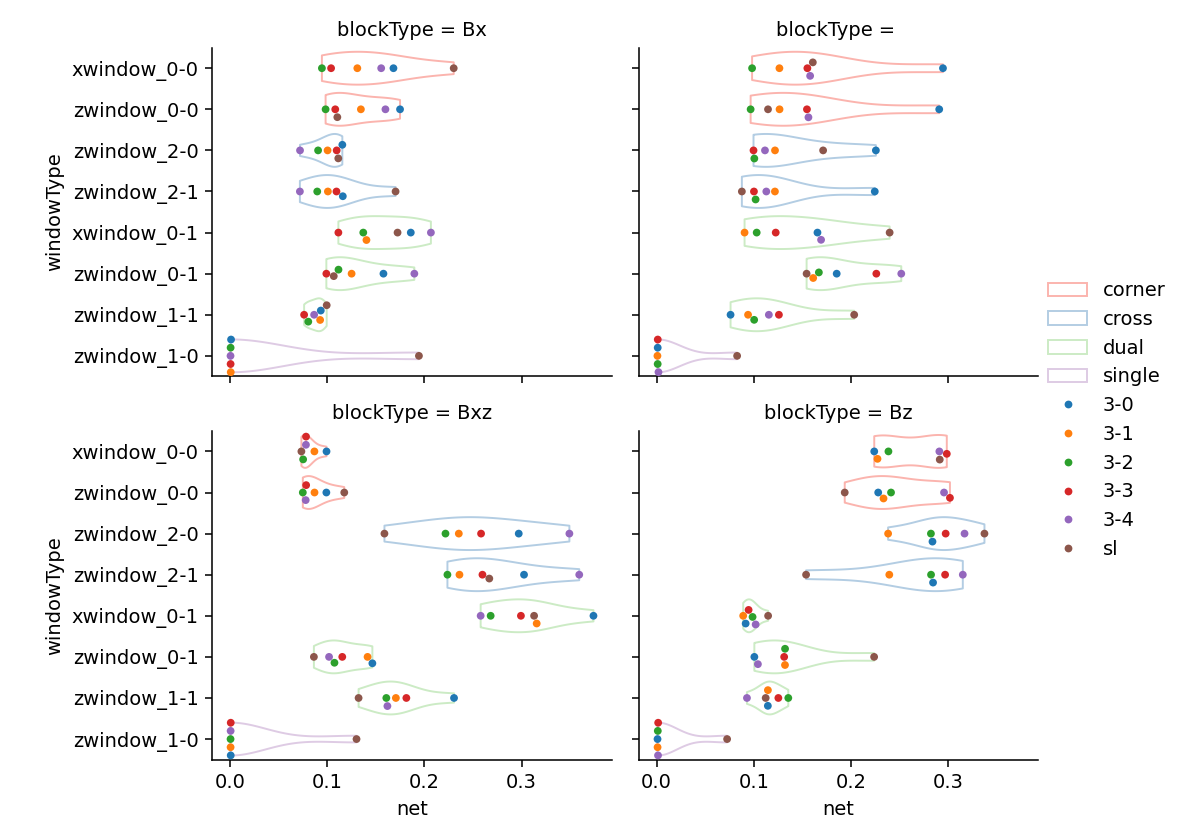

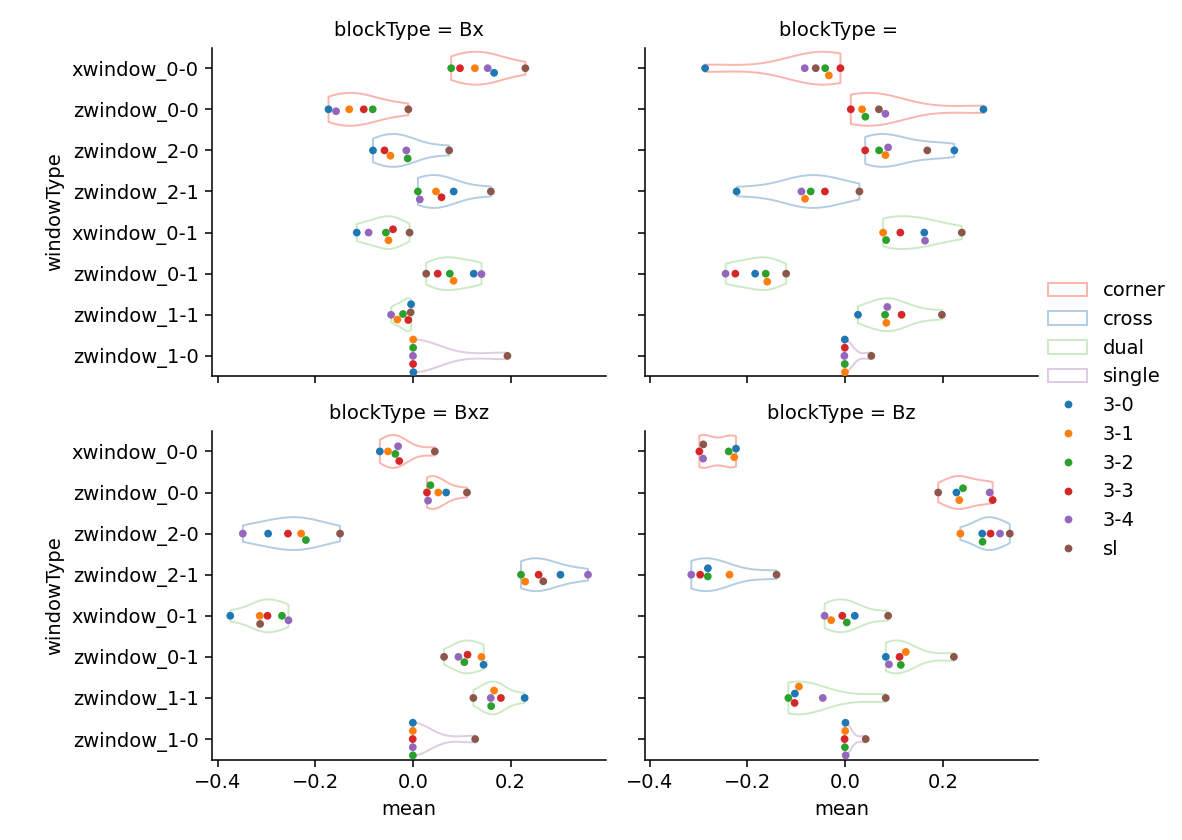

In [21]:
dfWindows = flowStats.loc[flowStats["openingType"].isin(["xwindow", "zwindow"])]

sns.lmplot(data = dfWindows, x = 'x', y = 'z', hue = 'houseType', fit_reg = False, palette = "tab10")
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/windowKeyLayout', bbox_inches="tight", dpi = 300)

g = sns.FacetGrid(dfWindows, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "net", "windowType", "roomType", inner = None, fill = False, palette = "Pastel1", linewidth = 1, density_norm = "width", cut = 0)
# g.map(sns.boxplot, "net", "windowType", color = "1", linewidth = 1, fliersize = 0)
g.map(sns.swarmplot, "net", "windowType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netWindowViolins', bbox_inches="tight")

g = sns.FacetGrid(dfWindows, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "mean", "windowType", "roomType", inner = None, fill = False, palette = "Pastel1", linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.swarmplot, "mean", "windowType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanWindowViolins', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/groups/gorle/codes/miniconda3/en

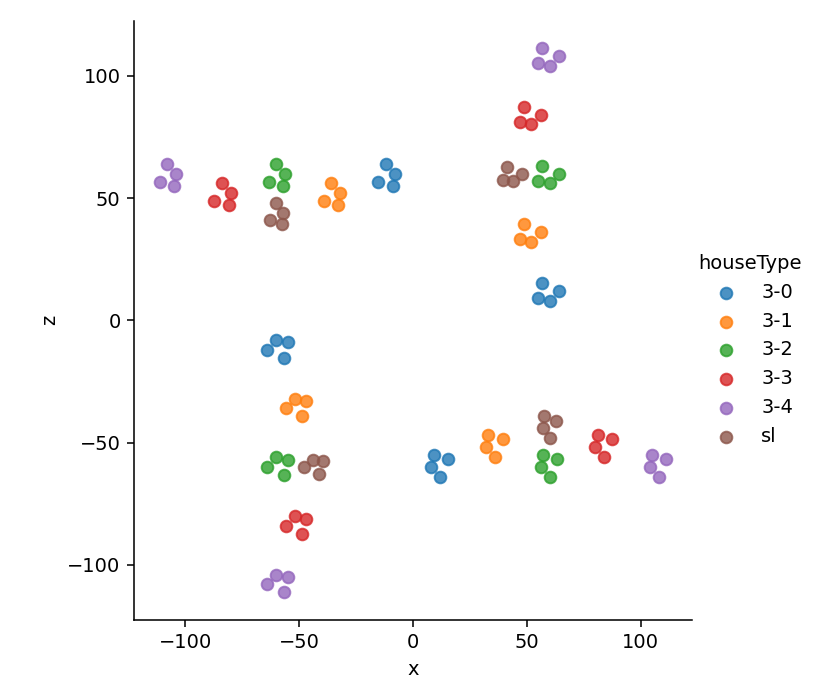

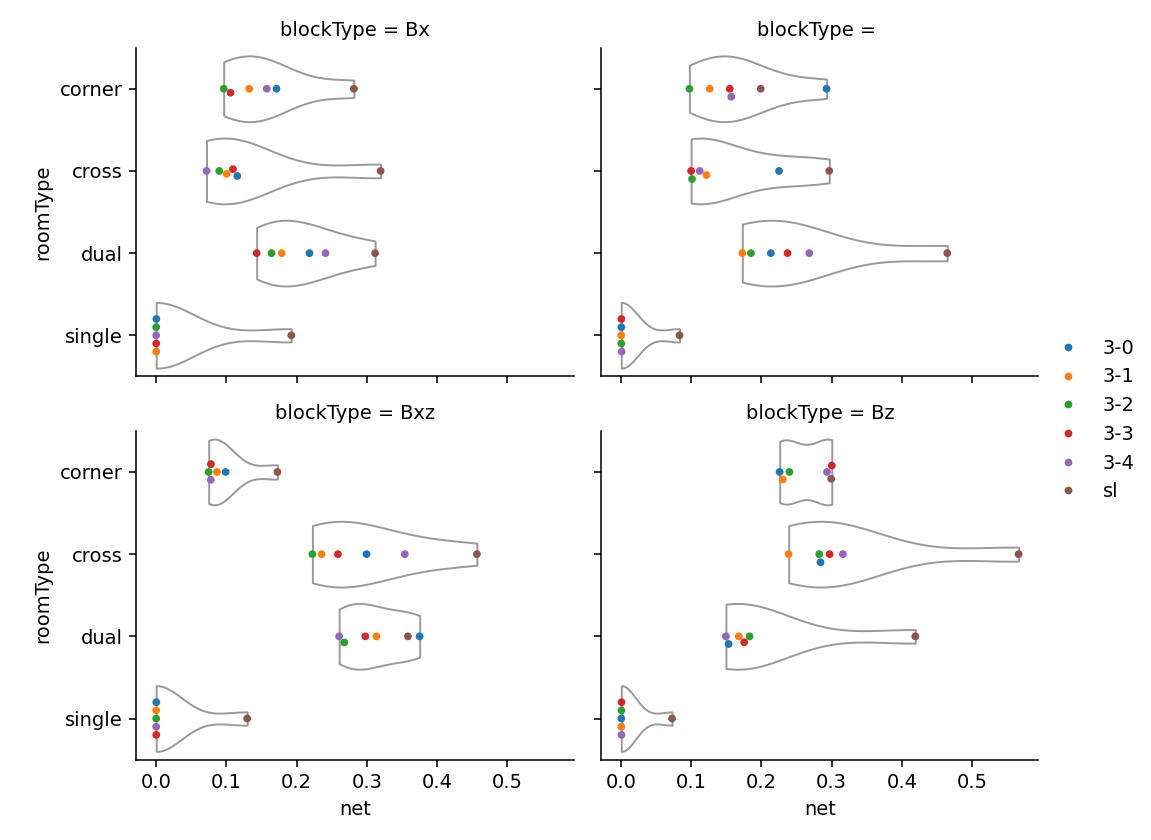

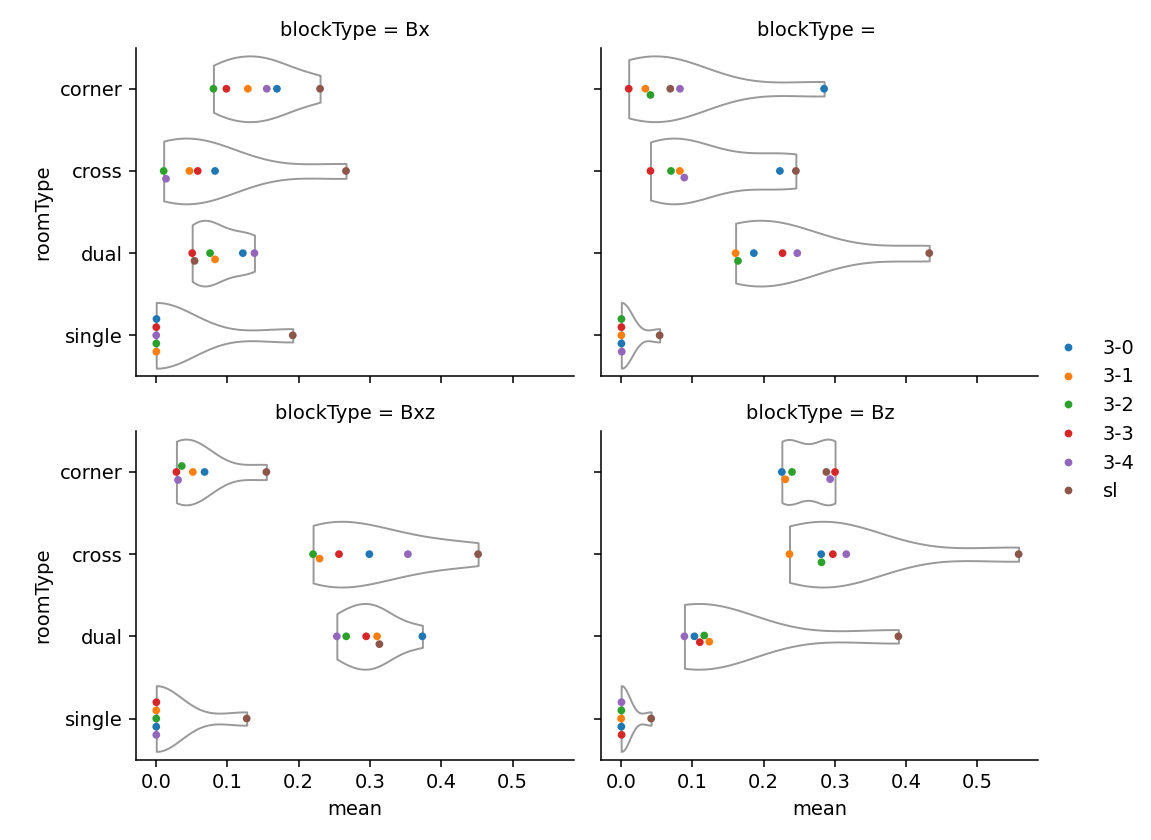

In [22]:
sns.lmplot(data = roomVentilation, x = 'x', y = 'z', hue = 'houseType', fit_reg = False, palette = "tab10")
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/roomKeyLayout', bbox_inches="tight", dpi = 300)

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "net", "roomType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
# g.map(sns.boxplot, "net", "roomType", color = "1", linewidth = 1, fliersize = 0)
g.map(sns.swarmplot, "net", "roomType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netRoomViolins', bbox_inches="tight")

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.violinplot, "mean", "roomType", color = "1", inner = None, linewidth = 1, density_norm = "width", cut = 0)
g.map(sns.swarmplot, "mean", "roomType", "houseType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanRoomViolins', bbox_inches="tight")

/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/groups/gorle/codes/miniconda3/envs/pycascade/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


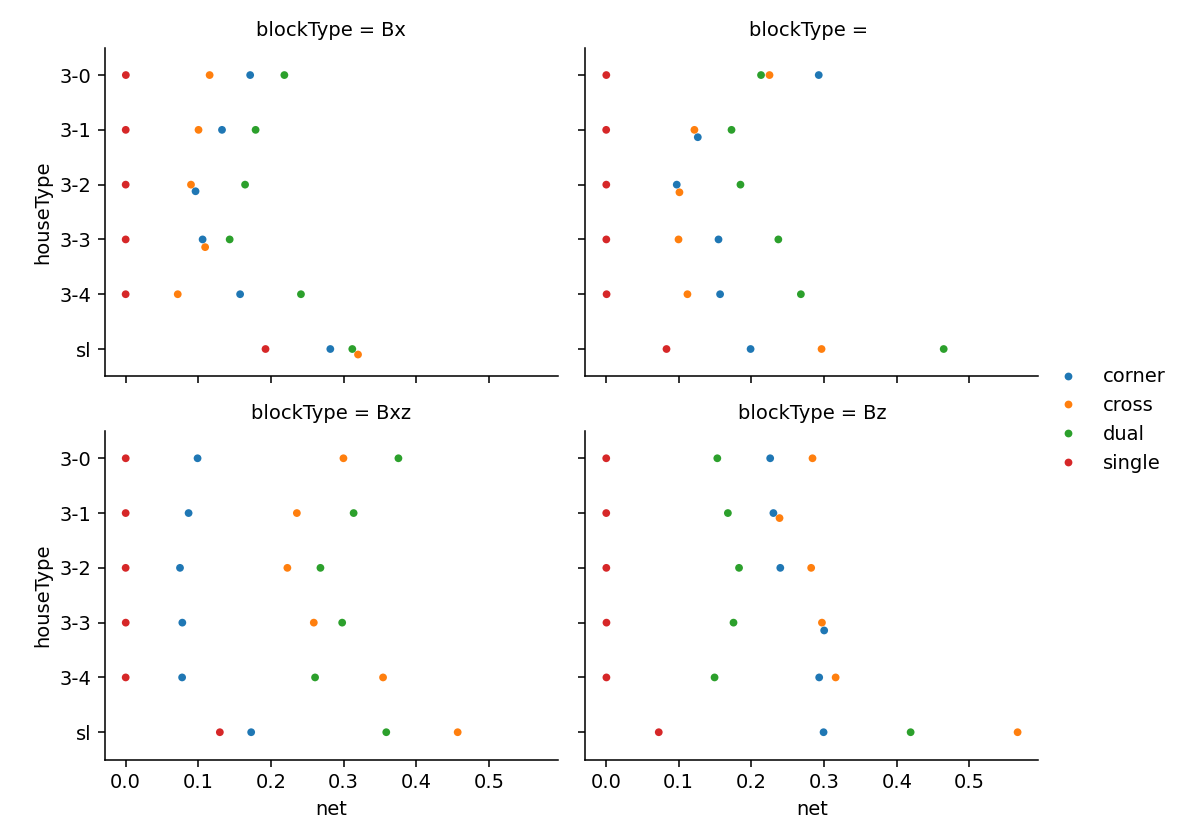

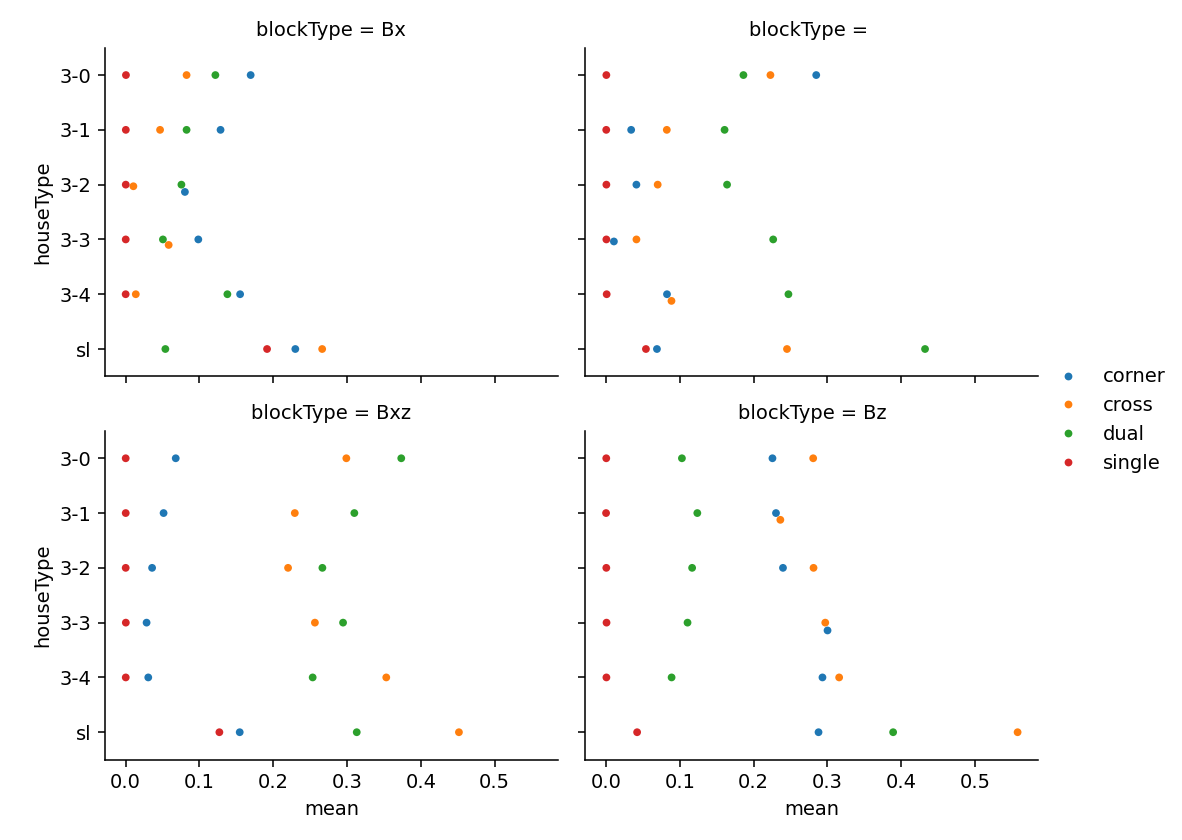

In [23]:
g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.swarmplot, "net", "houseType", "roomType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/netHouseByRoom', bbox_inches="tight")

g = sns.FacetGrid(roomVentilation, col = "blockType", col_wrap = 2, col_order = ["Bx", '', "Bxz", "Bz"], aspect = 1.25, legend_out = True)
g.map(sns.swarmplot, "mean", "houseType", "roomType", palette = "tab10", size = 4)
g.add_legend()
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/meanHouseByRoom', bbox_inches="tight")

## Convergence

In [31]:
data = probes.statistics(
    names = [name for name in probes.probe_names if "door" not in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = qois,
    processing = [],
    parrallel=False
    )

processing data took 6 seconds


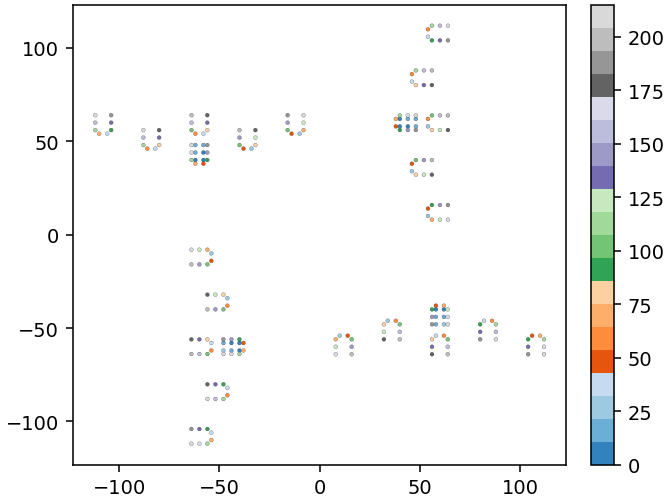

In [32]:
xPlot = data.index.values
yPlot = np.arange(len(data.keys()))

fig, ax=plt.subplots(1, 1, constrained_layout = True)
im=ax.scatter(flowStats.loc[data.keys(), 'x'], flowStats.loc[data.keys(), 'z'], s=4, c=yPlot, cmap='tab20c', edgecolors="black", linewidths=.1)
fig.colorbar(im)
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/dataMap', bbox_inches="tight")

/tmp/ipykernel_24208/2200143076.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(constrained_layout = True)


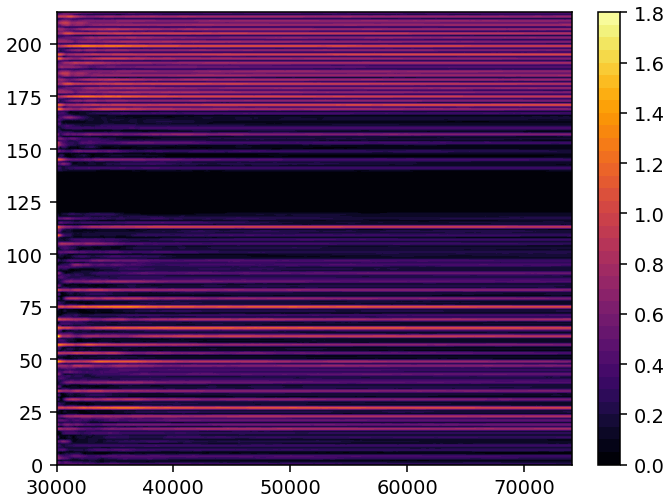

In [33]:
dataCumMean = probePost.cumulative_mean(data)

fig, ax = plt.subplots(constrained_layout = True)
im = ax.contourf(xPlot, yPlot, dataCumMean.abs().T, cmap = "inferno", levels=40)
fig.colorbar(im)
# ax.set_yticks(yPlot)
# ax.set_yticklabels(dataCumMean.keys())

plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/contourCumMean', bbox_inches="tight")

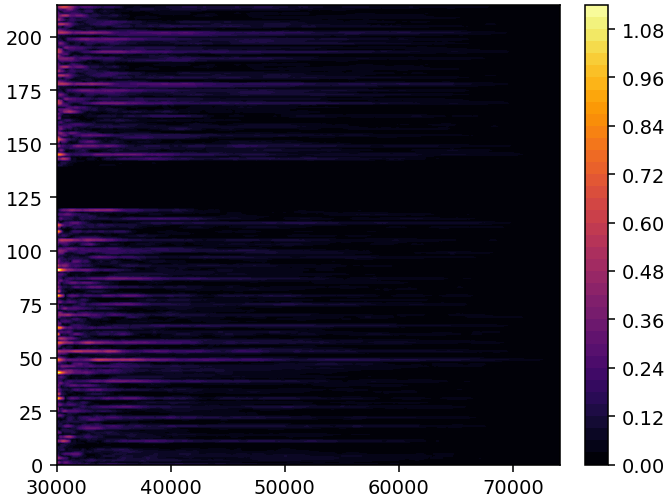

In [34]:
dataConv = probePost.convergence(dataCumMean)

fig, ax = plt.subplots(constrained_layout = True)
im = ax.contourf(xPlot, yPlot, dataConv.abs().T, cmap = "inferno", levels=40)
fig.colorbar(im)

plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/contourConv', bbox_inches="tight")

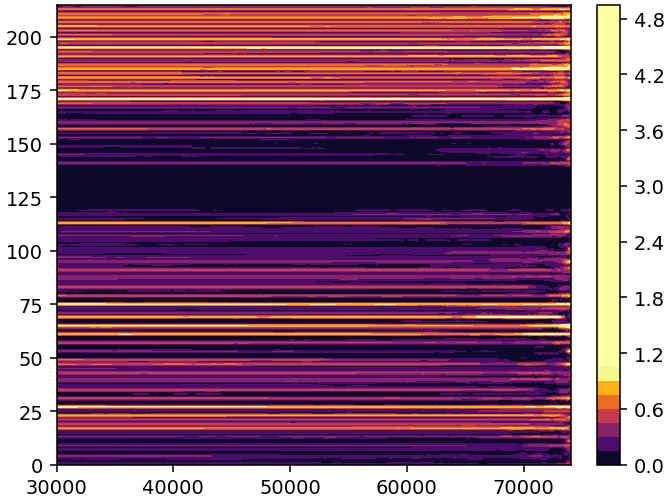

In [35]:
dataRevCumMean = probePost.reverse(data)
dataRevCumMean = probePost.cumulative_mean(dataRevCumMean)
dataRevCumMean = probePost.reverse(dataRevCumMean)

fig, ax = plt.subplots(constrained_layout = True)
im = ax.contourf(xPlot, yPlot, dataRevCumMean.abs().T, cmap = "inferno", levels=40, vmax = 1)
fig.colorbar(im)

plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/contourRevCumMean', bbox_inches="tight")

In [36]:
@utils.no_kwargs
@utils.dict_apply
def sma(df): 
    return df.rolling(8000).mean()
    
dataSMA = sma(data)

fig, ax = plt.subplots(constrained_layout = True)
im = ax.contourf(xPlot, yPlot, dataSMA.abs().T, cmap = "inferno", levels=40)
fig.colorbar(im)

plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/contourSMA', bbox_inches="tight")

: 

: 